In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [4]:
df = pd.read_csv('../datasets/calculated_features_final19356_253493_147567893553946290238604574175400014296.csv')
print(df.shape)

(88228, 122)


In [5]:
print(list(df.columns))
print(df.index)

['scout_id', 'match_week', 'player_id', 'team_id', 'delta_price', 'position_id', 'year', 'name', 'has_played', 'score', 'average_points_last_1_rounds', 'average_price_last_1_rounds', 'team_points_last_1_rounds', 'team_goals_scored_last_1_rounds', 'team_goals_taken_last_1_rounds', 'enemy_goals_scored_last_1_rounds', 'enemy_goals_taken_last_1_rounds', 'enemy_points_last_1_rounds', 'home_team', 'team_goals_taken_last_1_rounds.1', 'average_plays_last_1_rounds_rb_play', 'average_plays_last_1_rounds_fc_play', 'average_plays_last_1_rounds_gc_play', 'average_plays_last_1_rounds_ca_play', 'average_plays_last_1_rounds_cv_play', 'average_plays_last_1_rounds_sg_play', 'average_plays_last_1_rounds_dd_play', 'average_plays_last_1_rounds_dp_play', 'average_plays_last_1_rounds_gs_play', 'average_plays_last_1_rounds_fs_play', 'average_plays_last_1_rounds_pe_play', 'average_plays_last_1_rounds_a_play', 'average_plays_last_1_rounds_ft_play', 'average_plays_last_1_rounds_fd_play', 'average_plays_last_1_ro

In [6]:
auxiliary = ['scout_id','match_week','player_id', 'team_id', 'position_id', 
             'home_team.1', 'home_team.2', 'home_team.3', 'year', 'name', 'has_played',
            'team_goals_taken_last_1_rounds.1', 'team_goals_taken_last_5_rounds.1',
            'team_goals_taken_last_10_rounds.1', 'team_goals_taken_last_20_rounds.1']
y = df['score']

In [7]:
df_home = df.loc[df.home_team == 1]
df_away = df.loc[df.home_team == 0]
df_away.home_team = -1
df.fillna(0, inplace=True)
df.shape

/Users/henriquelopes/PycharmProjects/cartola_api/env_cartola/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(88228, 122)

In [8]:
df = pd.concat([df_home, df_away])
print(df.home_team.value_counts())

-1.0    43472
 1.0    43364
Name: home_team, dtype: int64


In [9]:
df_errado = df.loc[df.has_played == 0].loc[df.score != 0] ## Droping players that didnt play and had points
print(df_errado.shape)
print(df.shape)
df = df.drop(df_errado.index)

(795, 122)
(86836, 122)


In [10]:
df = df.loc[df.has_played ==1] ## Remove players that didnt play
print(df.shape)

(37529, 122)


In [11]:
for column in df.columns:
    if column not in auxiliary:
        if df[column].isnull().sum() > 0:
            print('{0:.<50}{1}'.format(column, df[column].isnull().sum()))

average_points_last_1_rounds......................1774
average_price_last_1_rounds.......................1774
team_points_last_1_rounds.........................582
team_goals_scored_last_1_rounds...................582
team_goals_taken_last_1_rounds....................582
enemy_goals_scored_last_1_rounds..................578
enemy_goals_taken_last_1_rounds...................578
enemy_points_last_1_rounds........................578
average_plays_last_1_rounds_rb_play...............1774
average_plays_last_1_rounds_fc_play...............1774
average_plays_last_1_rounds_gc_play...............1774
average_plays_last_1_rounds_ca_play...............1774
average_plays_last_1_rounds_cv_play...............1774
average_plays_last_1_rounds_sg_play...............1774
average_plays_last_1_rounds_dd_play...............1774
average_plays_last_1_rounds_dp_play...............1774
average_plays_last_1_rounds_gs_play...............1774
average_plays_last_1_rounds_fs_play...............1774
average_plays_la

In [12]:
## Replacing nulls with column average
for column in df.columns: 
    if 'average' in column or 'goals' in column or 'points' in column:
        df[column].fillna(df[column].mean(), inplace=True)

## Studying variables

# Average points by posicion

Avg points per position:  [3.5127742946708458, 3.184149184149184, 2.8120796783625734, 2.2032717147497873, 2.5697998361231416, 3.3860667752442999]


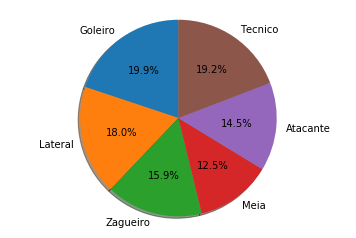

In [13]:
avg_points = list()
pos_list = ['Goleiro','Lateral', 'Zagueiro','Meia','Atacante', 'Tecnico']
for pos in sorted(df.position_id.unique()):
    avg_points.append(df.loc[df['position_id'] == pos].score.mean())

print("Avg points per position: ", avg_points)
fig1, ax1 = plt.subplots()
ax1.pie(avg_points, labels=pos_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [14]:
## Position categories into one hot encoding
from sklearn.preprocessing import OneHotEncoder

pos_categories = ['Goleiro','Lateral', 'Zagueiro','Meia','Atacante', 'Tecnico']
enc = OneHotEncoder()
enc.fit(df.position_id.reshape(-1,1))
position_encoded = enc.transform(df.position_id.reshape(-1,1)).toarray()
position_encoded = pd.DataFrame(data=position_encoded, index= df.index, columns=pos_categories)  # 1st row as the column names

df_hot_encoding = pd.concat([df, position_encoded],axis=1)

/Users/henriquelopes/PycharmProjects/cartola_api/env_cartola/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/henriquelopes/PycharmProjects/cartola_api/env_cartola/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [15]:
print(df.shape)
print(list(df.columns))

(37529, 122)
['scout_id', 'match_week', 'player_id', 'team_id', 'delta_price', 'position_id', 'year', 'name', 'has_played', 'score', 'average_points_last_1_rounds', 'average_price_last_1_rounds', 'team_points_last_1_rounds', 'team_goals_scored_last_1_rounds', 'team_goals_taken_last_1_rounds', 'enemy_goals_scored_last_1_rounds', 'enemy_goals_taken_last_1_rounds', 'enemy_points_last_1_rounds', 'home_team', 'team_goals_taken_last_1_rounds.1', 'average_plays_last_1_rounds_rb_play', 'average_plays_last_1_rounds_fc_play', 'average_plays_last_1_rounds_gc_play', 'average_plays_last_1_rounds_ca_play', 'average_plays_last_1_rounds_cv_play', 'average_plays_last_1_rounds_sg_play', 'average_plays_last_1_rounds_dd_play', 'average_plays_last_1_rounds_dp_play', 'average_plays_last_1_rounds_gs_play', 'average_plays_last_1_rounds_fs_play', 'average_plays_last_1_rounds_pe_play', 'average_plays_last_1_rounds_a_play', 'average_plays_last_1_rounds_ft_play', 'average_plays_last_1_rounds_fd_play', 'average_pl

# Relation Between Points and Other Stats

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

pd.options.display.max_columns = 999

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

In [ ]:






trace1 = {
  "x": df.loc[df.position_id == 5]['average_plays_last_20_rounds_g_play'],
  "y": df.loc[df.position_id == 5]['score'],
  "marker": {
    "color": 'red',
    "colorsrc": "Aldemuro:22:1a1899",
    "size": 1
  }, 
  "mode": "markers", 
  "name": "fpl_points", 
  "text": df['name']+", Club:"+str(df['team_id'])+", Pos:"+str(df['position_id']),
  #"textsrc": "Aldemuro:22:5dc54a", 
  "type": "scatter", 
  "uid": "0d217c", 
  "xsrc": "Aldemuro:22:d61533", 
  "ysrc": "Aldemuro:22:1c3243",
  
}
data = [trace1]
#data = [trace]
layout = {
  "autosize": True, 
  "hovermode": "closest",
  "title": "Relation between points and value from every players",
  "xaxis": {
    "autorange": True, 
    "range": [3.48535752785, 13.0146424722], 
    "title": "average number of goals", 
    "type": "linear"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [-17.5245518316, 281.524551832], 
    "title": "score", 
    "type": "linear"
  }
}
# Plot and embed in ipython notebook!
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-scatter')

# Most impactful stats by position

NameError: name 'sns' is not defined

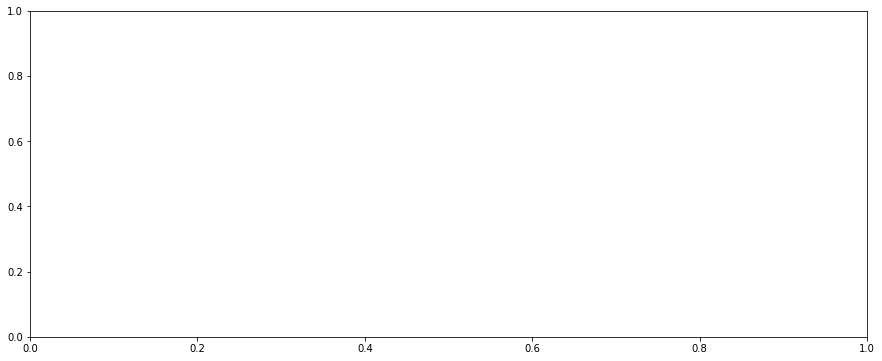

In [17]:
#number of premier league player position
plt.subplots(figsize=(15,6))
sns.countplot('position_id',data=df,palette='hot',edgecolor=sns.color_palette('dark',7),order=df['position_id'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Numero de jogadores por posição')
plt.show()

[0.035845656327961668, -0.015056835990669697, -0.0025644746180576712, -0.12792515591786494, -0.0078563885446453104, 1.5930716882440539, 4.1200337962684923, 0.17034331958745713, -2.1218340684096622, 0.092680227769183263, -0.17430246728760559, 0.013543220603120593, 0.0011089160864451515, 0.0059080125146361365, 0.0048747199352612621, 0.038150001161685085, -0.0013009557818820089, -0.0015457315963876418]


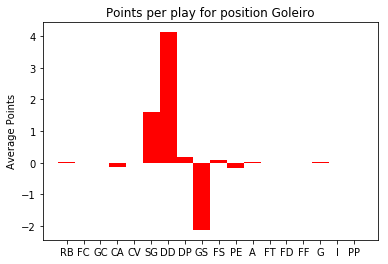

[1.7991143179078164, -0.51233094541184854, -0.011168891992445449, -0.2485915806742372, -3.7310881410146713e-05, 1.3256738456764274, 0.013058808493551347, 0.0005397640844001225, -0.0067234208301084359, 0.46773657374326455, -0.79282626992963368, 0.31221284192896553, 0.026608463196137865, 0.12041635132327125, 0.13885720330822146, 0.22596737549568244, -0.036032888438684289, -0.0047282189392491344]


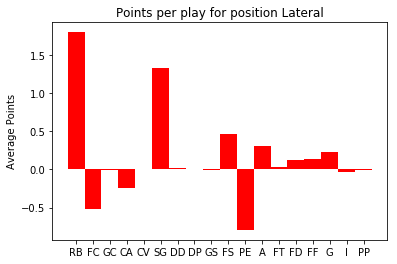

[1.510235962581604, -0.41585889052854008, -0.037692250133093887, -0.27696457617263692, -3.7413488973447469e-05, 1.3388548896363408, 0.013094721140706613, 0.0005412484738158734, -0.0067419107130152313, 0.28918210944201972, -0.50989058241148943, 0.071312818883548776, 0.033480178721987934, 0.10084265194987656, 0.13767509666173544, 0.32199532883390131, -0.026357882204345526, -0.00097571772565240521]


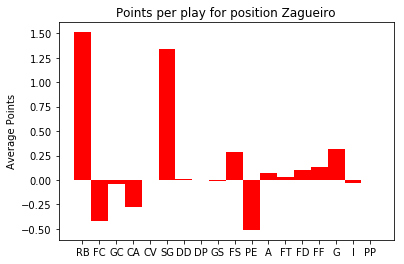

[1.7233390329177418, -0.51510814217541867, -0.0042158544565097256, -0.23582227251728916, -0.00081920687297909727, 0.028206015148145299, 0.016013147286051674, 0.00066187675449013556, -0.0082444832598471737, 0.48108844601507289, -0.64272647752217582, 0.30505121292208748, 0.053238112017378693, 0.21288295501222812, 0.21794586223681181, 0.5406921977921888, -0.035244153013696496, -0.0066373170535778698]


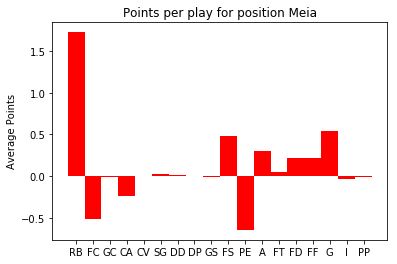

[0.77411963658865379, -0.467390430206299, -0.0018864974088733505, -0.19152837800492128, -4.3803511263927238e-05, 0.026419590200473575, 0.015682393638617072, 0.00063369079628481403, -0.0078933927297596875, 0.57583449985826873, -0.51058746450561054, 0.36697660160803086, 0.090587912034757745, 0.35605015619896707, 0.31031921710619437, 1.2955835109768146, -0.15259244353746224, -0.018829648095587515]


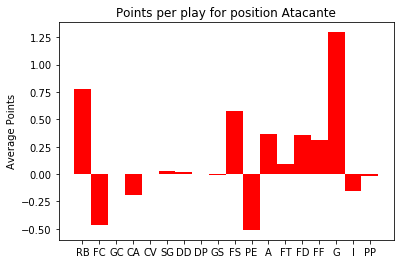

[0.037006737400796318, -0.012384773865936156, -0.00027057102785560622, -0.0061936168012765129, -2.4597366168691466e-05, 0.015164276242998292, 0.0086090781590420148, 0.00035584189724040331, -0.0044324453835982028, 0.012183485419455697, -0.015910068385233015, 0.0072357252146234086, 0.0014061494326435288, 0.0055040706363475283, 0.0054857046029415709, 0.016575345148875556, -0.0016496633577135745, -0.00022096633941541167]


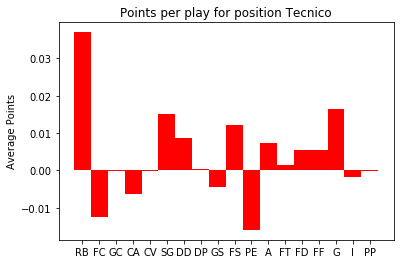

In [18]:
pontuacao = [1.7, -0.5, -6.0, -2.0, -5.0, 5.0, 3.00, 7.00, -2.0,
             0.5, -0.3, 5.0, 3.5, 1.0, 0.7, 8.0, -0.5, -3.5]
abreviacao = ['RB', 'FC', 'GC', 'CA', 'CV', 'SG', 'DD', 'DP', 'GS',
              'FS', 'PE', 'A', 'FT', 'FD', 'FF', 'G', 'I', 'PP']


pos_list = ['Goleiro','Lateral', 'Zagueiro','Meia','Atacante', 'Tecnico']

descricao = ['Robadas de Bola', 'Faltas Cometidas', 'Gol Contra', 'Cartao Amarelo',
             'Cartao Vermelho', 'Jogo sem sofrer gol', 'Defesa Dificil', 'Defesa de Penalti',
             'Gol Sofrido', 'Falta Sofrida', 'Passe Errado', 'Assistencia',
             'Finalizacao na Trave', 'Finalizacao defendida', 'Finalizao pra Fora', 'Gol',
             'Impedimento', 'Penalti Perdido']
play_dict = {
    'RB': 1.7,
    'FC': -0.5,
    'GC': -6.0,
    'CA': -2.0,
    'CV': -5.0,
    'SG': 5.0,
    'DD': 3.0,
    'DP': 7.0,
    'GS': -2.0,
    'FS': 0.5,
    'PE': -0.3,
    'A': 5.0,
    'FT': 3.5,
    'FD': 1.0,
    'FF': 0.7,
    'G': 8.0,
    'I': -0.5,
    'PP': -3.5
}

description_dict = {
    'RB': 'Robadas de Bola',
    'FC': 'Faltas Cometidas',
    'GC': 'Gol Contra',
    'CA': 'Cartao Amarelo',
    'CV': 'Cartao Vermelho',
    'SG': 'Jogo sem sofrer gol',
    'DD': 'Defesa Dificil',
    'DP': 'Defesa de Penalti',
    'GS': 'Gol Sofrido',
    'FS': 'Falta Sofrida',
    'PE': 'Passe Errado',
    'A': 'Assistencia',
    'FT': 'Finalizacao na Trave',
    'FD': 'Finalizacao Defendida',
    'FF': 'Finalizacao pra Fora',
    'G': 'Gol',
    'I': 'Impedimento',
    'PP': 'Penalti Perdido'
}


for pos in sorted(df.position_id.unique()):
    play_list = list()
    for play in abreviacao:
        play_list.append(play_dict[play] * df.loc[df['position_id'] == pos]['average_plays_last_1_rounds_' + play.lower() + '_play'].mean())
    
    print(play_list)
    ind = np.arange(len(play_list))  # the x locations for the groups
    width = 1       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, play_list, width=width, color='r')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Average Points')
    ax.set_title('Points per play for position %s' % (str(pos_list[int(pos) - 1])))
    ax.set_xticks(ind)
    ax.set_xticklabels(abreviacao)

    plt.show()

# Team Analysis

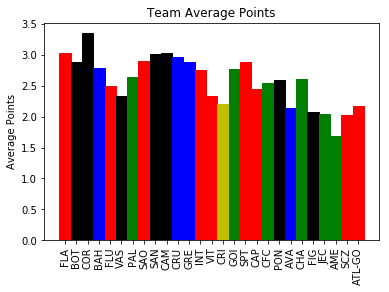

In [19]:
avg_points = list()


team_dict = {
'265':'BAH',
'288':'CRI',
'267':'VAS',
'290':'GOI',
'314':'AVA',
'317':'JEC',
'262':'FLA',
'263':'BOT',
'264':'COR',
'266':'FLU',
'275':'PAL',
'276':'SAO',
'277':'SAN',
'282':'CAM',
'283':'CRU',
'284':'GRE',
'285':'INT',
'287':'VIT',
'292':'SPT',
'293':'CAP',
'294':'CFC',
'303':'PON',
'315':'CHA',
'316':'FIG',
'327':'AME',
'344':'SCZ',
'373':'ATL-GO'
}

color_dict = {
'265':'b',
'288':'y',
'267':'k',
'290':'g',
'314':'b',
'317':'g',
'262':'r',
'263':'k',
'264':'k',
'266':'r',
'275':'g',
'276':'r',
'277':'k',
'282':'k',
'283':'b',
'284':'b',
'285':'r',
'287':'r',
'292':'r',
'293':'r',
'294':'g',
'303':'k',
'315':'g',
'316':'k',
'327':'g',
'344':'r',
'373':'r'
}
team_list = list()
color_list = list()
for team in sorted(df.team_id.unique()):
    avg_points.append(df.loc[df.team_id == team].score.mean())
    team_list.append(team_dict[str(team)])
    color_list.append(color_dict[str(team)])
    
ind = np.arange(len(team_list))  # the x locations for the groups
width = 1    # the width of the bars


fig, ax = plt.subplots()
rects1 = plt.bar(ind, avg_points, color='g', width=1,align='center')
for index,color in enumerate(color_list):
    rects1[index].set_color(color)
# add some text for labels, title and axes ticks
ax.set_ylabel('Average Points')
ax.set_title('Team Average Points')
ax.set_xticks(ind)
ax.set_xticklabels(team_list, rotation='vertical')

plt.show()

In [ ]:
pd.crosstab(df.team_id,df.position_id).plot.bar(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))

fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('Number Of Player in every Clubs and position')

plt.show()

In [20]:
print("Average home points: ",df.loc[df.home_team == 1].score.mean())
print("Average away points: ",df.loc[df.home_team == -1].score.mean())

Average home points:  3.15039408341
Average away points:  2.22683491118


# Top Players per round

In [21]:
for year in (2014,2015,2016,2017):
    print("Year: " , year)
    for rodada in sorted(df.match_week.unique()):
        years = df.loc[df.year == year]
        points = years.loc[years.match_week == rodada].sort_values(by='score', ascending=False)[0:19]
        
        print("Top 20 Player, Rodada: %s" %(rodada))
        print(points[['score','player_id', 'scout_id']])
        


Year:  2014
Top 20 Player, Rodada: 1
       score  player_id  scout_id
14196   22.1      68728     43167
19489   17.0      37899     54977
30379   16.6      38194     71178
162     14.5      78891     19682
42349   14.1      78648     95168
29145   14.1      38162     70117
26336   13.9      73896     66422
19346   12.8      80944     54739
23174   12.4      37919     56134
18742   12.3      37798     50731
37345   11.7      69325     85810
31200   11.0      52950     73547
24399   10.4      38055     61185
40372   10.3      62023     91866
1721    10.2      41218     21294
7060    10.2      79594     30732
12817   10.2      72376     44863
30108    9.6      74059     70723
27935    9.4      82525     68098
Top 20 Player, Rodada: 2
       score  player_id  scout_id
18715   19.0      50418     50688
7887    15.9      37655     33043
23725   15.8      68923     60057
31361   13.5      38229     73818
2577    13.2      86189     21647
7443    12.6      86859     31338
31589   12.4      69

26502    8.6      51415     66698
Top 20 Player, Rodada: 16
       score  player_id  scout_id
16708   24.5      80287     40361
8743    16.7      37656     34393
9886    14.7      72018     36201
19051   14.0      68872     51251
32503   12.6      54395     75724
4054    12.4      71123     26981
26544   12.3      68953     66767
7929    11.8      79887     33109
104     11.8      70934     19562
35227   11.6      60819     82275
37820   11.4      69329     86606
31148   11.0      82768     73463
24689   11.0      38055     61668
13337   10.8      37701     41735
37743   10.7      60969     86475
19315   10.6      37851     54686
39531   10.2      38515     89459
39001   10.1      61985     90577
25320   10.0      68929     62722
Top 20 Player, Rodada: 17
       score  player_id  scout_id
29916   20.3      38162     70406
38700   16.1      78379     89077
7631    14.9      63119     32637
9891    14.3      49675     36209
8762    14.0      37656     34424
12309   13.4      37688     40

Top 20 Player, Rodada: 32
       score  player_id  scout_id
19310   20.8      80913     54679
19840   20.6      50453     53563
37693   15.4      69325     86393
24432   14.9      73527     61240
32722   13.8      54395     76092
36722   13.7      38431     84770
3713    11.4      42145     26442
15464   11.0      50348     46282
13099   11.0      50347     45335
43106   10.9      62104     95394
11133   10.8      50292     38172
27659   10.3      38100     67637
1247    10.1      36522     20542
20145    9.1      37840     54073
30168    9.1      38162     70826
39942    9.0      61149     90148
19948    8.9      89273     53743
24643    8.9      68925     61589
22227    8.6      50645     58554
Top 20 Player, Rodada: 33
       score  player_id  scout_id
3101    19.0      71123     27475
38603   17.6      84848     88914
10284   17.4      63283     36829
31695   17.0      52950     74374
17589   16.8      68833     49809
35724   14.2      38398     83102
39216   14.1      38525     90

Top 20 Player, Rodada: 12
       score  player_id  scout_id
56003   20.3      82463    205555
64615   20.0      62056    213167
50715   16.3      38315    191267
45692   15.4      75295    190244
55329   14.8      50295    202881
58520   14.0      68872    208072
54890   13.8      90917    202442
50542   13.5      42500    191094
64062   12.9      87754    212614
46899   11.9      68938    197451
60688   11.6      51683    210240
48825   11.2      71892    192377
64265   11.0      71724    212817
50743   11.0      42234    191295
47309   10.7      73649    197861
45661   10.7      50301    190213
55039   10.4      72490    202591
53569   10.4      89275    201121
45573    9.9      73918    190125
Top 20 Player, Rodada: 13
       score  player_id  scout_id
50275   25.1      49675    190827
48067   23.4      78435    196619
44876   17.6      78968    189428
66576   14.7      54395    215128
66606   14.1      60852    215158
66982   13.5      38162    216534
47979   12.1      52253    196

49900    9.1      78967    190452
Top 20 Player, Rodada: 31
       score  player_id  scout_id
55083   20.6      42116    202635
48690   18.8      37644    197242
52965   17.4      38910    200517
61529   17.0      53189    211081
47648   16.6      87420    198200
58132   16.0      68911    207684
61936   15.7      54797    213488
61760   15.7      80949    211312
48603   15.4      38913    197155
60540   13.8      63194    210092
54217   11.3      38139    203769
61878   11.1      38032    213430
62818   11.0      68872    211370
66834   11.0      71724    216386
60369   10.6      92182    209921
51487   10.6      73800    199039
65547   10.6      87754    216099
63978    9.9      68893    212530
52733    9.9      68954    200285
Top 20 Player, Rodada: 32
       score  player_id  scout_id
54735   22.7      71631    204287
47398   20.0      37656    197950
49044   20.0      69249    192596
55485   16.7      69051    203037
55339   13.1      68690    202891
57004   12.8      68827    206

Top 20 Player, Rodada: 8
       score  player_id  scout_id
26851   28.2      79578     67281
874     18.4      50393     23940
1900    16.2      52253     28576
18228   13.9      70360     52872
14548   13.7      69051     43756
2444    13.6      38425     21437
25866   12.3      62128     64634
4564    12.3      83257     22790
12815   11.2      90290     44860
30686   11.1      56102     72691
20477   11.0      41218     56629
13229   10.7      78435     41554
27615   10.6      51548     67562
2876    10.5      38062     22121
29117   10.5      87552     70067
23443   10.4      73421     59584
18411   10.4      89342     53176
13837    9.8      89976     42568
37595    9.5      89898     86230
Top 20 Player, Rodada: 9
       score  player_id  scout_id
36      27.5      70944     19416
32723   21.7      63013     76093
13247   21.4      78435     41583
37105   21.1      51318     85411
40028   18.0      71778     90289
36290   16.0      68952     84050
6320    15.1      68920     3355

Top 20 Player, Rodada: 25
       score  player_id  scout_id
11412   14.2      77809     38614
10515   14.1      87192     37196
28470   14.0      62121     63989
13531   13.3      84927     42058
12137   13.1      69782     39759
5398    13.0      89154     25108
16307   12.4      71829     47694
6359    12.1      51792     33621
6135    12.1      90265     30269
22223   11.1      37688     58544
2760    11.1      38425     21937
17051   10.9      78407     40907
2952    10.4      68928     22242
20651   10.1      94249     56920
427      9.6      70046     20229
10805    9.5      84890     37653
2645     9.4      50421     21756
31427    9.1      78850     73927
18037    9.1      39152     52552
Top 20 Player, Rodada: 26
       score  player_id  scout_id
40747   21.0      70222     92492
6154    19.5      90265     30299
16362   18.1      86485     47788
17308   15.2      78548     41335
26751   15.2      85241     67112
23771   13.5      73421     60132
16576   12.5      87999     48

       score  player_id  scout_id
70720   26.3      68690    220110
71850   26.3      68690    223602
71853   21.1      68758    223605
70725   21.1      68758    220115
71959   19.7      74061    223727
70828   19.7      74061    220234
72035   18.3      81905    223811
70905   18.3      81905    220319
71825   17.2      61149    223577
70695   17.2      61149    220085
71950   16.1      73649    223718
70820   16.1      73649    220226
71989   15.8      78850    223760
70862   15.8      78850    220271
71915   12.2      71704    223677
70785   12.2      71704    220185
71736   11.4      38246    223477
70607   11.4      38246    219986
68671   10.6      89493    220470
Top 20 Player, Rodada: 4
       score  player_id  scout_id
72655   21.1      82455    224615
69170   21.1      82455    221123
72827   18.4      92081    224829
69343   18.4      92081    221338
69420   15.7      97538    221470
72905   15.7      97538    224961
72556   15.3      73281    224506
69071   15.3      73281

Top 20 Player, Rodada: 21
       score  player_id  scout_id
83166   22.3      90031    238932
82767   14.5      68744    238400
83033   14.4      81905    238770
83222   14.3      90768    239001
83064   14.0      87999    238802
82934   13.8      99535    238654
82776   13.7      68873    238410
82997   13.0      79042    238730
82810   13.0      73991    238448
82770   12.2      68784    238403
82762   11.9      69177    238395
82719   11.0      52950    238352
82742   11.0      62121    238375
82703   10.7      50459    238334
83013   10.7      80318    238747
82844   10.7      71571    238486
82695   10.6      50328    238324
83150   10.6      91866    238911
82730   10.5      54797    238363
Top 20 Player, Rodada: 22
       score  player_id  scout_id
83345   22.6      42116    239151
83886   15.6      51792    239802
83714   14.7      71571    239565
83392   14.2      73281    239201
83621   13.9      68901    239458
83746   13.4      92708    239612
83494   13.2      82773    239

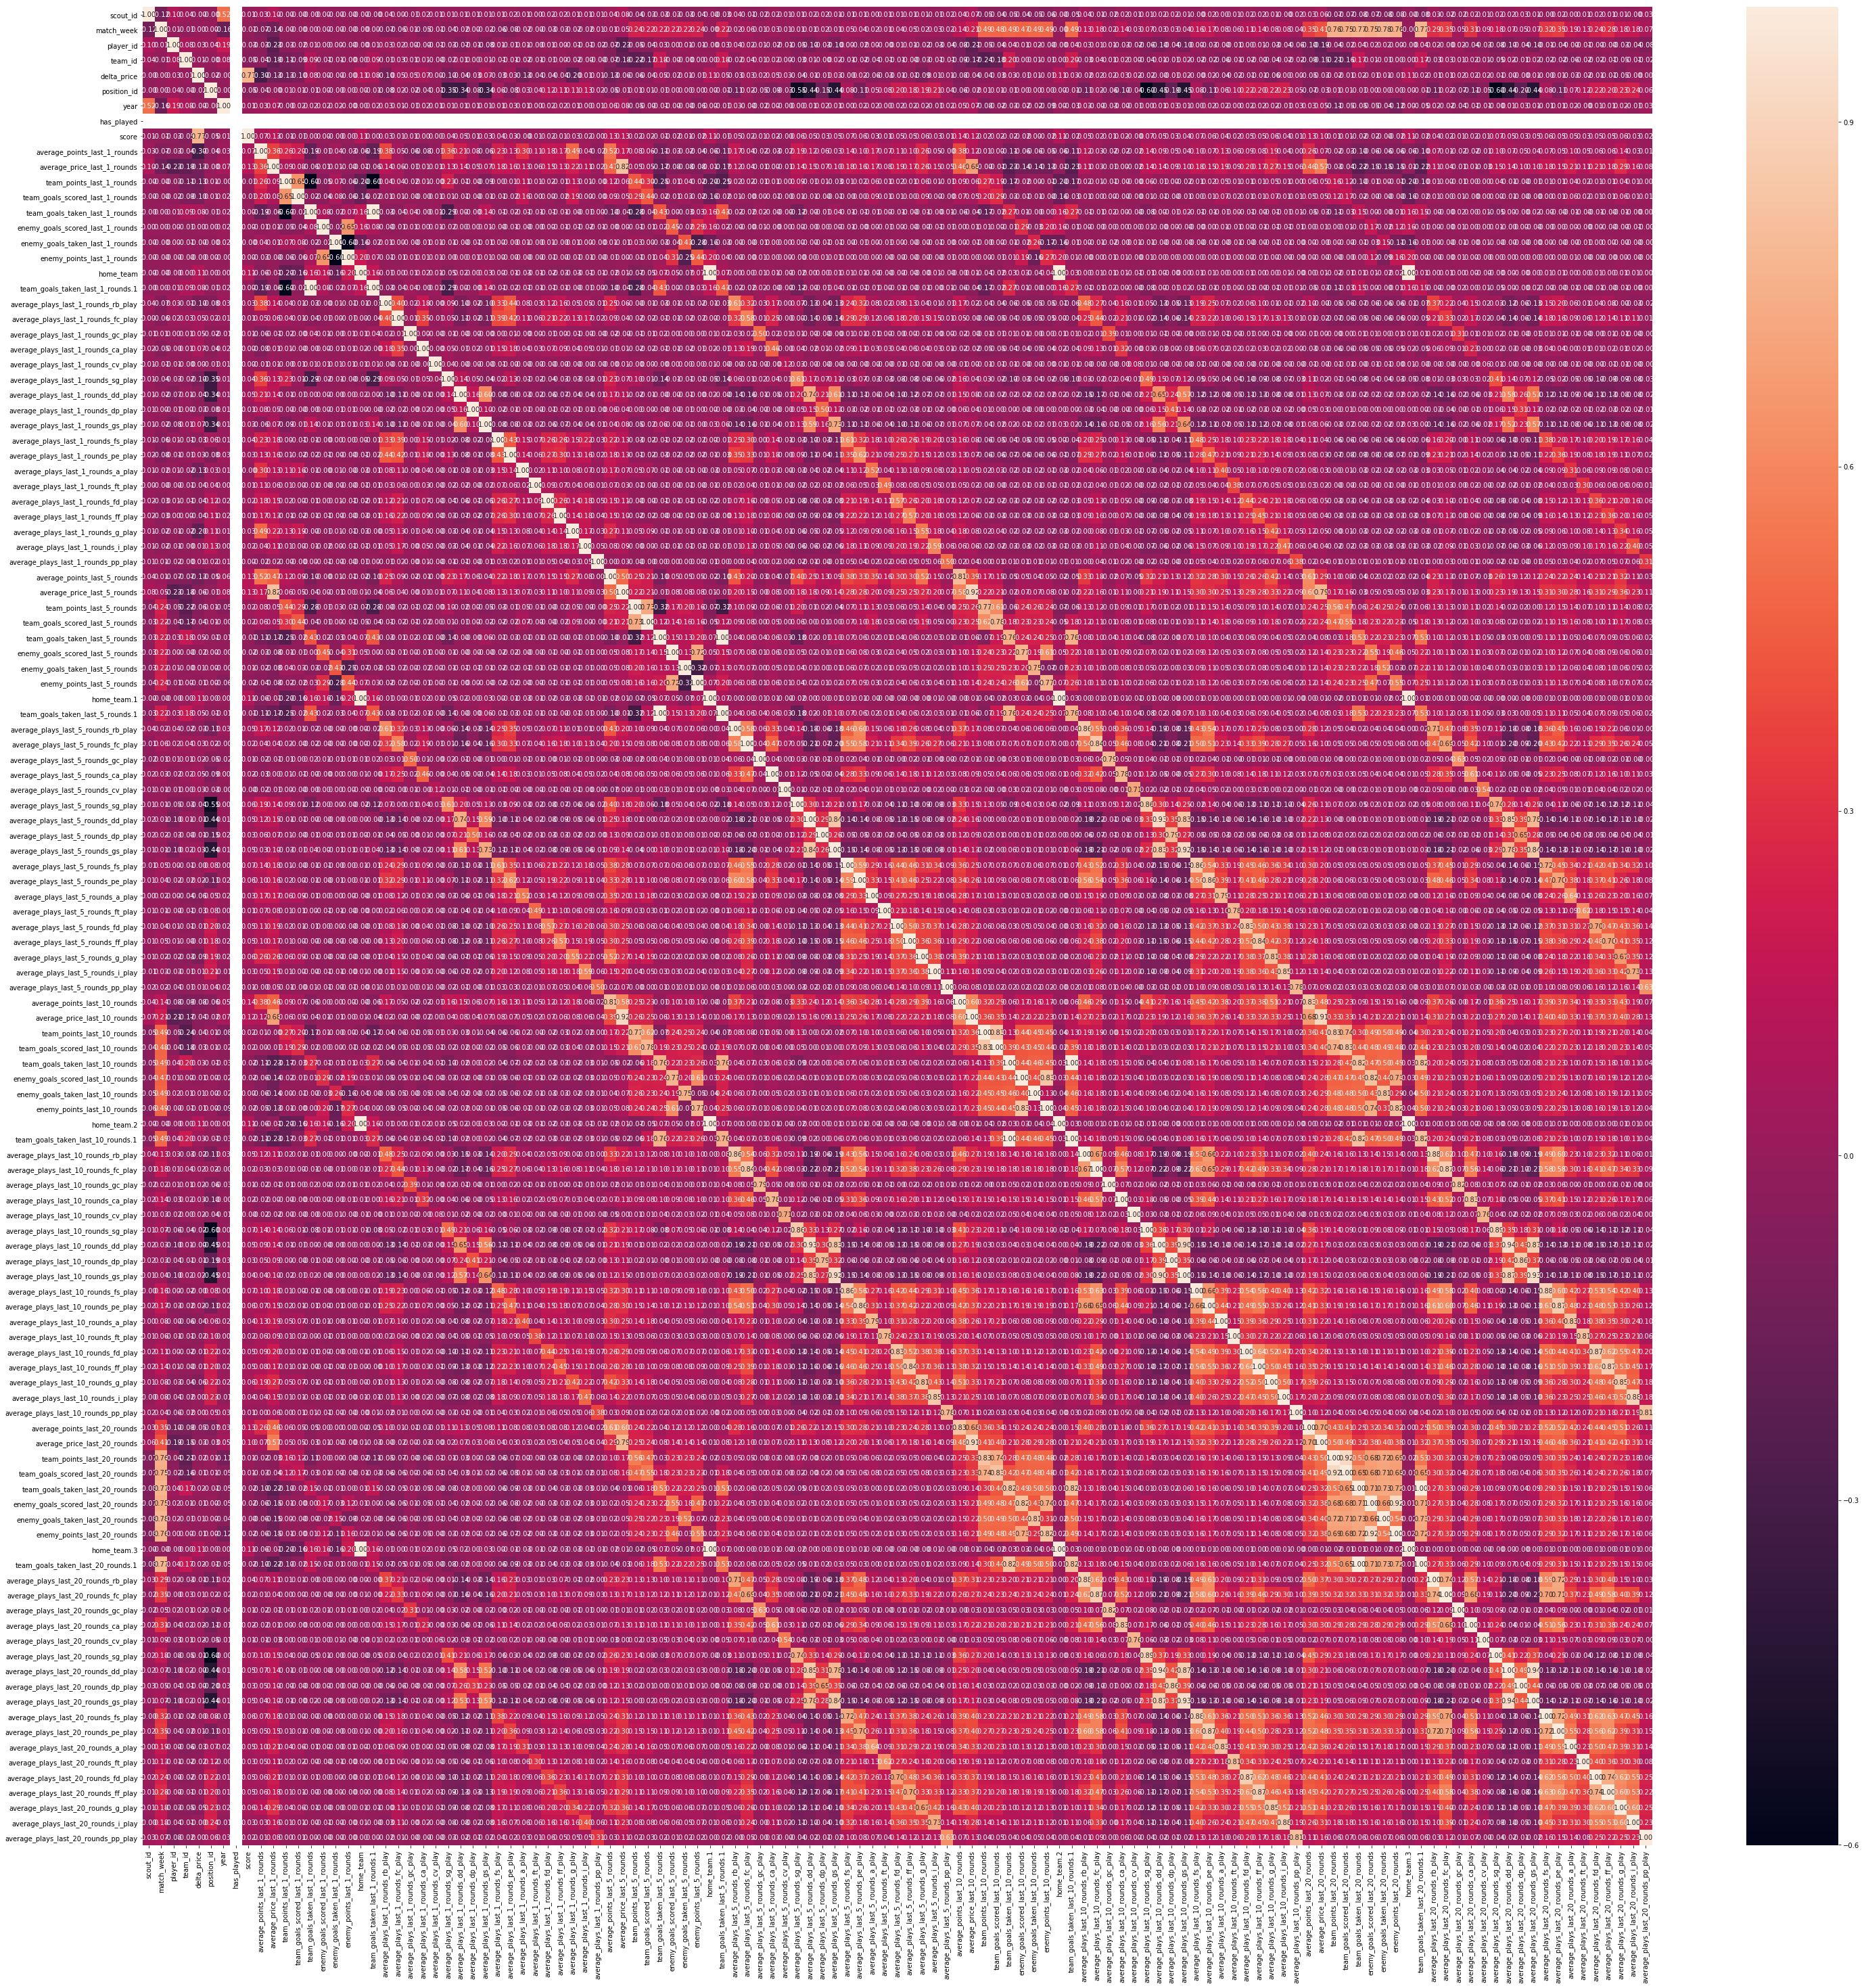

In [22]:
import seaborn as sns
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

## Train Test Split

In [23]:
import sys
import pandas as pd
import numpy as np
sys.path.append('../xgboost/python-package')
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search


In [24]:
df_hot_encoding = df_hot_encoding.loc[df.position_id != 1] ## Removendo goleiros e tecnicos
df_hot_encoding = df_hot_encoding.loc[df.position_id != 6]
df_hot_encoding = df_hot_encoding.drop(['Goleiro', 'Tecnico'], axis=1)
print(list(df_hot_encoding.columns))

['scout_id', 'match_week', 'player_id', 'team_id', 'delta_price', 'position_id', 'year', 'name', 'has_played', 'score', 'average_points_last_1_rounds', 'average_price_last_1_rounds', 'team_points_last_1_rounds', 'team_goals_scored_last_1_rounds', 'team_goals_taken_last_1_rounds', 'enemy_goals_scored_last_1_rounds', 'enemy_goals_taken_last_1_rounds', 'enemy_points_last_1_rounds', 'home_team', 'team_goals_taken_last_1_rounds.1', 'average_plays_last_1_rounds_rb_play', 'average_plays_last_1_rounds_fc_play', 'average_plays_last_1_rounds_gc_play', 'average_plays_last_1_rounds_ca_play', 'average_plays_last_1_rounds_cv_play', 'average_plays_last_1_rounds_sg_play', 'average_plays_last_1_rounds_dd_play', 'average_plays_last_1_rounds_dp_play', 'average_plays_last_1_rounds_gs_play', 'average_plays_last_1_rounds_fs_play', 'average_plays_last_1_rounds_pe_play', 'average_plays_last_1_rounds_a_play', 'average_plays_last_1_rounds_ft_play', 'average_plays_last_1_rounds_fd_play', 'average_plays_last_1_ro

In [25]:
df_hot_encoding = df_hot_encoding.drop(auxiliary, axis=1)

In [26]:
df_hot_encoding.shape

(32521, 111)

In [27]:
keeper_skills = ['dd', 'dp', 'gs'] ## removendo scouts de goleiro
for col in list(df_hot_encoding.columns):
    for skill in keeper_skills:
        if skill + '_play' in col:
            df_hot_encoding.drop([col], axis=1, inplace=True)
df_hot_encoding.shape

(32521, 99)

In [28]:
df_hot_encoding.drop(['delta_price'], axis=1, inplace=True) ## Seeing current info

In [29]:
from sklearn.model_selection import train_test_split
target = 'score'
X_train, X_test, y_train, y_test = train_test_split(df_hot_encoding.drop(['score'], axis=1), df_hot_encoding.score, test_size=0.2, random_state=42)
train = np.array(X_train).astype(float)

test = np.array(X_test).astype(float)

# XGBoost Parameter Otimization

In [ ]:
def modelfit(alg, X_train, y_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', verbose_eval = True,early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    print(alg.get_xgb_params())
    print('Fiting dataset')
    #Fit the algorithm on the data
    alg.fit(X_train, y_train,eval_metric='rmse', verbose=True)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
        
    #Print model report:
    print("\nModel Report")
    
    print("Explained variance: ", metrics.explained_variance_score(y_train.values, dtrain_predictions))
    print("Mean Absolute Error: ", metrics.mean_absolute_error(y_train.values, dtrain_predictions))
    print("Mean Squared Error: ", metrics.mean_squared_error(y_train.values, dtrain_predictions))
    print("Median Absolute Error: ", metrics.median_absolute_error(y_train.values, dtrain_predictions))
    print("R2 Score: ", metrics.r2_score(y_train.values, dtrain_predictions))
                    
    plot_importance(alg)
    fig = plt.gcf()
    fig.set_size_inches(20, 20)
    plt.show()

In [28]:
params = {}
params["objective"] = ("reg:linear",)
params["learning_rate"] = (0.01, 0.05, 0.1)
params["min_child_weight"] = (1,3,5)
params["subsample"] = (0.5, 0.7, 0.9)
params["colsample_bytree"] = (0.5, 0.7, 0.9)
params["silent"] = (0,)
params["max_depth"] = (3,4,5,6,7)
params["n_estimators"] = (500, 1000, 1500)


In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(XGBClassifier(), params, scoring='neg_mean_squared_error', cv=5, verbose=3)
clf.fit(df_hot_encoding.drop(['score'], axis=1), df_hot_encoding.score.values)
sorted(clf.cv_results_.keys())

Fitting 5 folds for each of 1215 candidates, totalling 6075 fits
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:linear, silent=0, subsample=0.5 


In [29]:

start_time = time.time()
plst = list(params.items())

xgtrain = xgb.DMatrix(X_train, label=y_train.values)
xgtest = xgb.DMatrix(X_test)


num_rounds = 1000
model = xgb.train(plst, xgtrain,num_boost_round=num_rounds)
print("Model train took : %s" % (time.time() - start_time))
preds1 = model.predict(xgtest)


Model train took : 134.6582989692688


In [ ]:
start_time = time.time()
xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 subsample=0.5,
 colsample_bytree=0.5,
 objective= 'reg:linear',
 scale_pos_weight=1)
xgb1.fit(X_train, y_train.values,eval_metric='rmse', verbose=True)
print("Model Fit took : %s" % time.time() - start_time)

In [44]:
def get_top_players(X_test, scores, num_players):
    df = X_test
    df['scores'] = scores
    top_list = list()
    top_players = df.sort_values(by='scores', ascending=False)[0:num_players]
    print(top_players)
    for players in top_players:
        print(players)
        element = dict()
        element['name'] = players.name
        element['id'] = players.id
        element['scout_id'] = players.index
        element['predicted'] = players.predicted
        top_list.append(element)

    print(top_list)
    return top_list

In [45]:
team_dict = get_top_players(X_test, preds1, 20)

       average_points_last_1_rounds  average_price_last_1_rounds  \
72655                          10.0                        34.74   
69467                           0.0                        24.48   
69703                           3.0                        30.18   
69246                           1.8                        16.84   
73158                          10.0                        10.26   
69420                          11.6                         7.40   
70820                          17.4                        26.48   
37855                           NaN                          NaN   
77348                          -0.5                        20.41   
29136                           2.9                        21.12   
72683                           3.2                        21.84   
39960                           9.0                         5.85   
16341                           8.5                        17.06   
74352                           0.2             

AttributeError: 'str' object has no attribute 'name'

In [ ]:
from sklearn import metrics
print(metrics.explained_variance_score(y_test.values, preds1))
print(metrics.mean_absolute_error(y_test.values, preds1))
print(metrics.mean_squared_error(y_test.values, preds1))
print(metrics.median_absolute_error(y_test.values, preds1))
print(metrics.r2_score(y_test.values, preds1))

print(preds1)
print(y_test.values)
# 0.931834118148
# 0.674473175137
# 1.13719610051
# 0.409076118469
# 0.931833478449

In [ ]:
from xgboost import plot_importance
plot_importance(model)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()